The align audio to video function accepts a Voltage reference copy of the LED signal and aligns it to the actual LED signal as shown in the video recording. 

In [9]:
import os 
import glob 
import warnings
import matplotlib.pyplot as plt
import numpy as np 
plt.rcParams['agg.path.chunksize'] = 10000
import peakutils as peak
import scipy.signal as signal 
import scipy.io.wavfile as WAV

from getting_sync_pseaks import align_audio_to_video, get_on_off_peaks

We begin by loading the audio LED voltage signal copy, which is recorded in the 4th channel. 

In [3]:
folder = 'Audio_analysis_1tomanybatcontext//'
filenames = glob.glob(folder+'*.WAV')

In [4]:
# load an example
fs, rec = WAV.read(filenames[4])


/home/tbeleyur/anaconda2/lib/python2.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


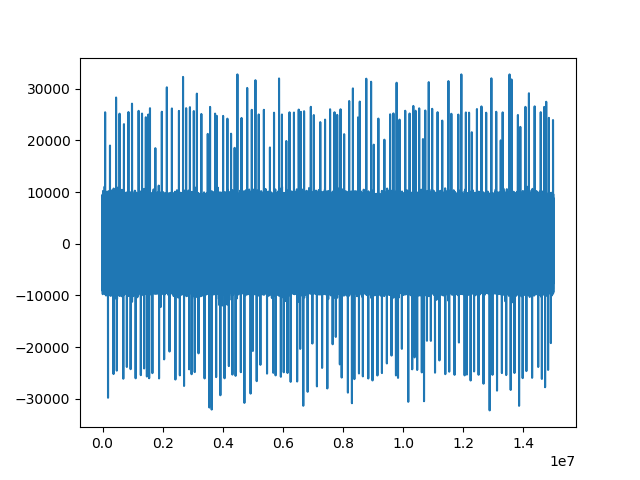

In [8]:
plt.figure()
plt.plot(rec[:,3])

And now let's create a fake LED signal which will then be used to align the audio. We actually don't take the LED signal itself, but the first order difference of the LED signal. This tells us when the voltage rose and dropped. 

For example, here's a regular 50% duty cycle square signal :

In [21]:
t= np.linspace(0,1,200)
LED = signal.square(np.sin(2*np.pi*25*t), 0.5) + 1

<IPython.core.display.Javascript object>


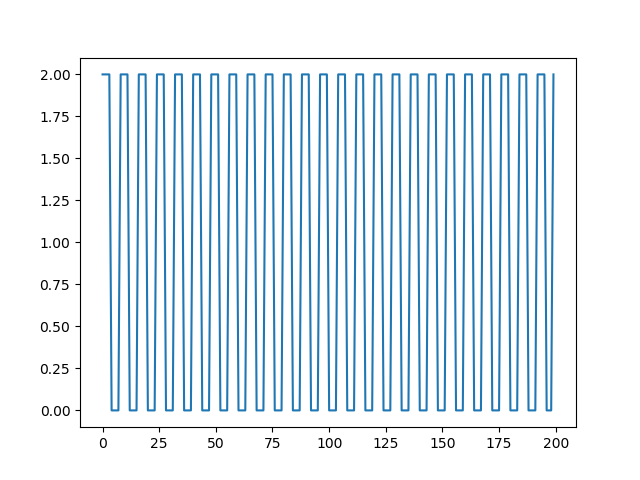

In [22]:
plt.figure()
plt.plot(LED)

What we want is actually the timepoints at which the signal went on and off, and so we take the first difference:

In [23]:
on_off_LED = np.diff(LED)

<IPython.core.display.Javascript object>


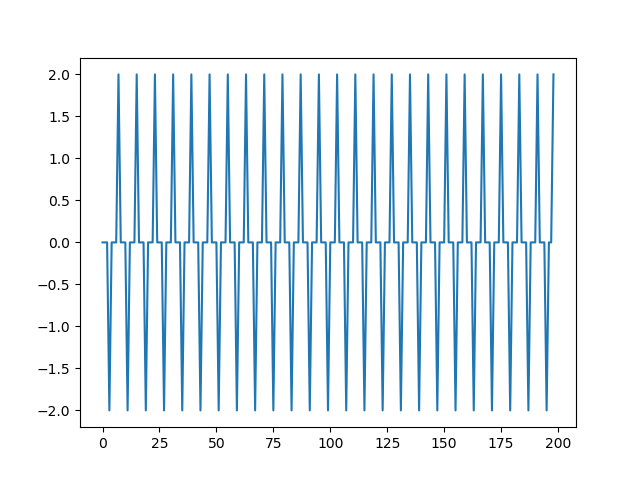

In [24]:
plt.figure()
plt.plot(on_off_LED)

In [11]:
on_off_peaks = get_on_off_peaks(rec[:,3], fs, 25)

Finding peaks
calculating indices for video frame rate
(1501, 25, 60.030976)


We recreate a signal where there's a match toward the last part of the LED signal

In [30]:
fake_LED = np.concatenate((LED,LED[::-1], on_off_peaks))


In [28]:
start, stop, crosscor = align_audio_to_video(fake_LED, 25, rec[:,3], fs)

Finding peaks
calculating indices for video frame rate
(1501, 25, 60.030976)
there might be a peak


And let's plot where our audio recording falls in the video timeframe

<IPython.core.display.Javascript object>


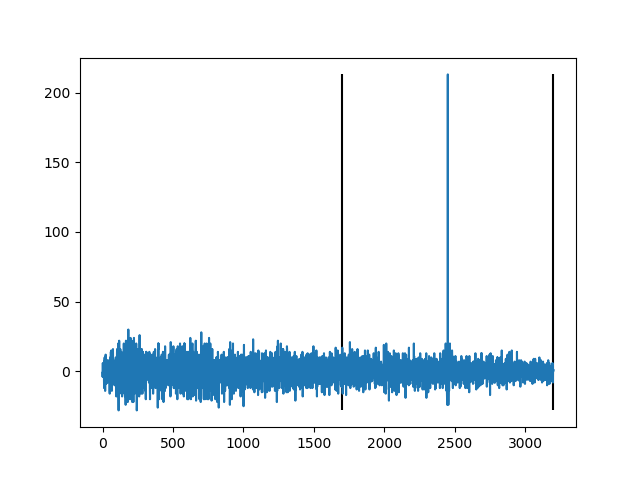

In [29]:
plt.figure()
plt.plot(crosscor)
plt.vlines([start,stop],np.min(crosscor), np.max(crosscor))

In [31]:
print (start, stop)

(1701, 3201)


With this, we know that the audio signal was simultaneously recorded with the 1701 to the 3201th frames of the video file. 